# Multiprocess

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

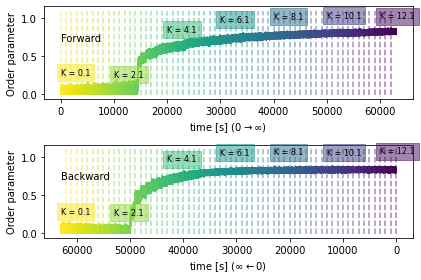

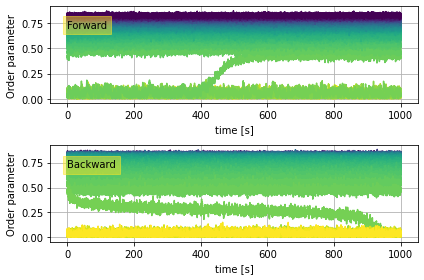

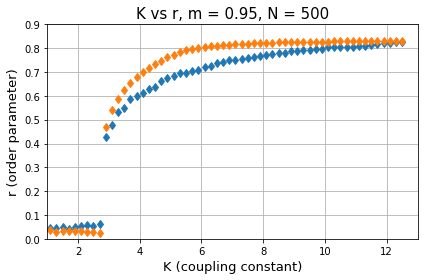

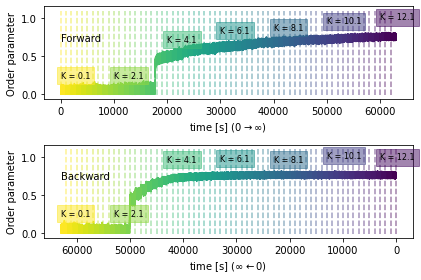

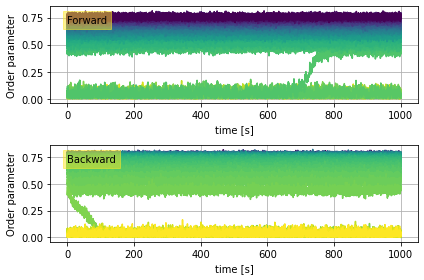

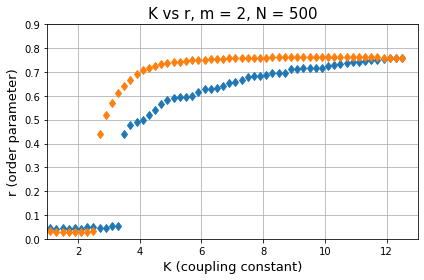

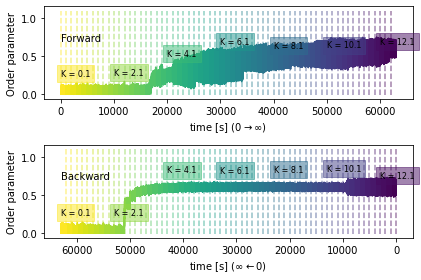

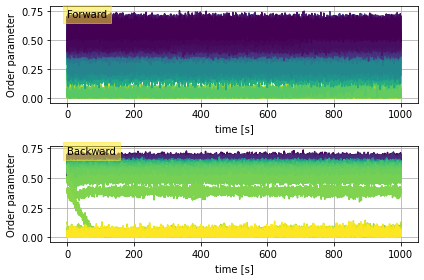

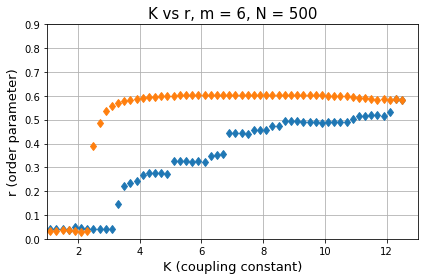

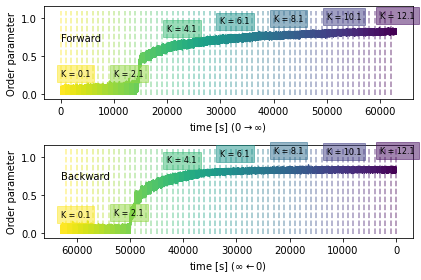

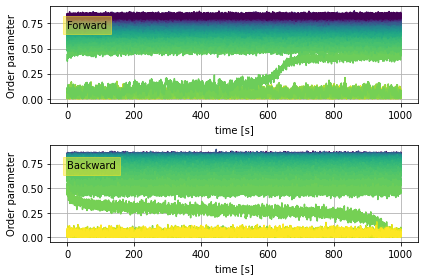

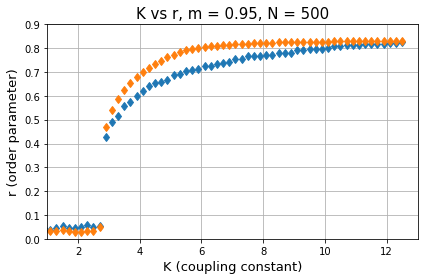

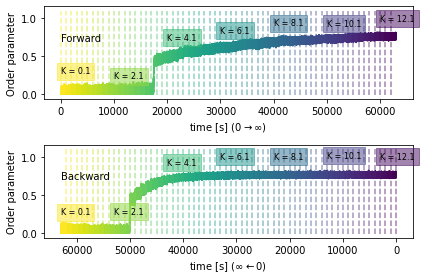

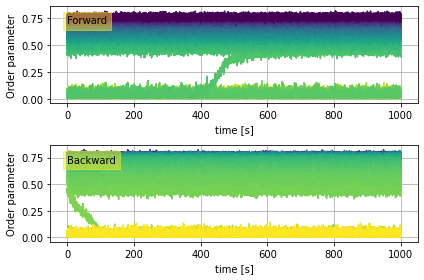

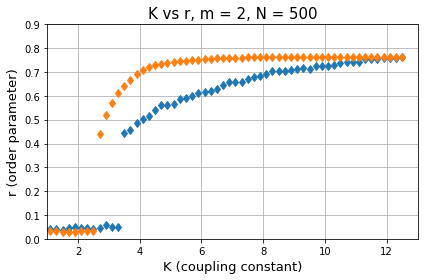

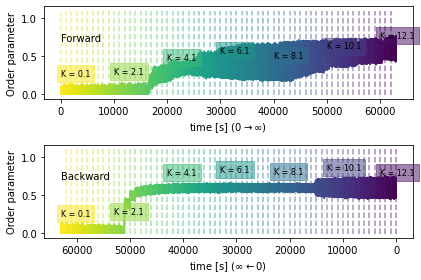

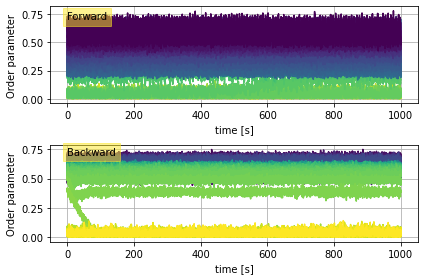

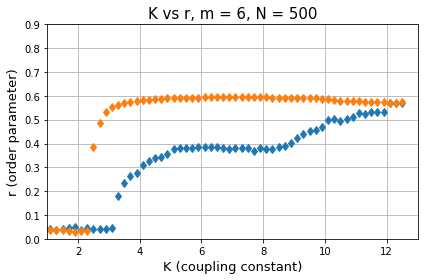

In [1]:
# Multiprocess
from TO_sim.Multi_m import Sim_Multi_mset,Sim_Multi_m_giveNoise, Sim_Multi_mset_Noise
import parmap
for Noise in [2e-2,3e-2]:
    Sim_Multi_mset_Noise(Noise)

# 231026 6

In [1]:
from TO_sim.analytical.sec_order_parameter import *
from parmap import parmap
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [2]:
df_read = pd.read_excel('Order parameter and secondary cluster2.xlsm',index_col=[0,1])
ms = df_read['r_mean_d'].unstack().columns
core = 14
index_ = 0
Ks = np.arange(0.1,10+0.05,0.1)
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 6
len(m_set)
df = pd.DataFrame(columns=['K','m','r_mean_u','r_mean_d','r_main_u','r_main_d','r_sec_u','r_sec_d','r_sec_ul','r_sec_ud'])
df = df.set_index(['K','m'])

In [3]:
for m in tqdm(m_set[num][:]):
    # m = round(m,2)
    r_ds = df_read['r_mean_d'].unstack()[m].to_numpy()
    r_us  = df_read['r_mean_u'].unstack()[m].to_numpy()
    r_mds = df_read['r_main_d'].unstack()[m].to_numpy()
    r_mus = df_read['r_main_u'].unstack()[m].to_numpy()
    r_sds,r_sus,r_su_ls,r_su_ds = rs_N_numpy(Ks,m,r_mus,samples=100)
    for K,r_d,r_u,r_md,r_mu,r_sd,r_su,r_su_l,r_su_d in zip(Ks,r_ds,r_us,r_mds,r_mus,r_sds,r_sus,r_su_ls,r_su_ds):
        df.loc[(K,m),'r_mean_d'] = r_d
        df.loc[(K,m),'r_mean_u'] = r_u
        df.loc[(K,m),'r_main_d'] = r_md
        df.loc[(K,m),'r_main_u'] = r_mu
        df.loc[(K,m),'r_sec_d'] = r_sd
        df.loc[(K,m),'r_sec_u'] = r_su
        df.loc[(K,m),'r_sec_ul'] = r_su_l
        df.loc[(K,m),'r_sec_ud'] = r_su_d

  0%|          | 0/14 [00:00<?, ?it/s]

In [4]:
df.sort_index().to_excel(f'231026 MULTI/{num} Order parameter and secondary cluster.xlsm')

#CAUCHY

In [1]:
import warnings
from tqdm.notebook import tqdm
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import pandas as pd
from scipy.stats import uniform
from scipy.stats import cauchy
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.DataFrame(columns=['K','m','rM_u','rM_d',
                           'r0_u','r0_d','rd_u','rd_d',
                           'r+_ul','r+_drift','mu',
                           'r+_total_u','r+_total_d','r+_total_ul','r+_total_ud'])
df = df.set_index(['K','m'])

In [3]:
Ks = np.arange(0.0,10+0.05,0.1)
ms = np.arange(0.0,10+0.05,0.1)

In [4]:
def g_u(x):
    return cauchy.pdf(x,0,1)
def g_sec(x,Or,Om):
    g = cauchy.pdf(x+Om,0,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

In [5]:
core = 31
index_ = 0
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 1

In [6]:
m_set

[array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. ]),
 array([3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
        4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
        5.7, 5.8, 5.9, 6. , 6.1]),
 array([6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
        7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
        8.8, 8.9, 9. , 9.1, 9.2]),
 array([ 9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. ])]

In [7]:
for m in tqdm(m_set[num]):
    F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m,g_n=g_u)
    r_du = lambda x: (F_R0u(x)-F_RMu(x))
    r_dd = lambda x: (F_R0d(x)-F_RMd(x))
    r_dp = lambda x: (F_R0u(x)-F_RMu(x))/2

    rs_d,rs_u,rs_dl,rs_ul,md,mu = OSP2.get_r_sec_np(Ks,m,F_RMu,g_sec=g_sec,samples=100)
    rs_uF = np.where(r_dp(Ks)<=rs_ul,rs_ul,np.nan)
    for i,K in enumerate(Ks):
        df.loc[(K,m),'rM_d'] = F_RMd(K)
        df.loc[(K,m),'rM_u'] = F_RMu(K)
        df.loc[(K,m),'r0_d'] = F_R0d(K)
        df.loc[(K,m),'r0_u'] = F_R0u(K)
        df.loc[(K,m),'rd_u'] = r_du(K)
        df.loc[(K,m),'rd_d'] = r_dd(K)
        df.loc[(K,m),'r+_ul'] = rs_uF[i]
        df.loc[(K,m),'r+_drift'] = r_dp(K)
        df.loc[(K,m),'mu'] = mu[i]
        df.loc[(K,m),'r+_total_d'] = rs_d[i]
        df.loc[(K,m),'r+_total_u'] = rs_u[i]
        df.loc[(K,m),'r+_total_d'] = rs_dl[i]
        df.loc[(K,m),'r+_total_u'] = rs_ul[i]

  0%|          | 0/31 [00:00<?, ?it/s]

In [8]:
df.sort_index().to_excel(f'231108 MULTI/{num} CAUCHY Order parameter and secondary cluster.xlsm')